In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving fifa_datos.csv to fifa_datos.csv


In [ ]:
import pandas as pd
import io

data = pd.read_csv(io.StringIO(uploaded['fifa_datos.csv'].decode('utf-8')))

data.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### 1. Con los datos de la FIFA, organizar a los jugadores de acuerdo al peso en las siguientes escalas y generar un cuadro tipo PIE.

<ul>
  <li>Menor a 125 Lbs</li>
  <li>125 - 150 Lbs</li>
  <li>150 - 175 Lbs</li>
  <li>Mayor a 175 Lbs</li>
</ul>

In [ ]:
new_data = data[data["Weight"].notna()]
new_data.reset_index(inplace=True, drop=True)

In [ ]:
import re

weights = []
for i in (new_data.index):
  temp_string = new_data["Weight"][i]
  weights.append([float(s) for s in re.findall(r'-?\d+\.?\d*', temp_string)])

In [ ]:
category01 = 0
category02 = 0
category03 = 0
category04 = 0
for i in range(len(weights)):
  if weights[i][0] < 125:
    category01 += 1
  elif (weights[i][0] >= 125) and (weights[i][0] < 150):
    category02 += 1
  elif (weights[i][0] >= 150) and (weights[i][0] < 175):
    category03 += 1
  elif weights[i][0] >= 175:
    category04 += 1

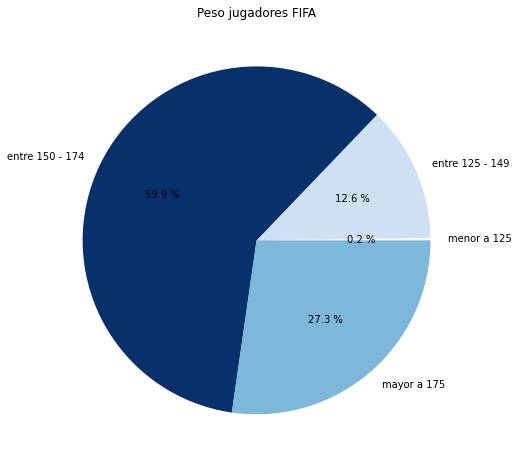

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm

pesos = [category01, category02, category03, category04]
categorias = ["menor a 125","entre 125 - 149","entre 150 - 174","mayor a 175"]

normdata = colors.Normalize(min(pesos), max(pesos))
colormap = cm.get_cmap("Blues")
colores =colormap(normdata(pesos))

plt.title('Peso jugadores FIFA')
plt.pie(pesos, labels = categorias, colors=colores, autopct="%0.1f %%")
plt.rcParams["figure.figsize"] = (10, 8)
plt.show()

### 2. Generar un gráfico de barras (histograma) de acuerdo a su habilidad (Overall) en base a los siguientes segmentos contando el número de jugadores

<ul>
  <li>40</li>
  <li>50</li>
  <li>60</li>
  <li>70</li>
  <li>80</li>
  <li>90</li>
</ul>

In [ ]:
ove_data = data[data["Overall"].notna()]
ove_data.reset_index(inplace=True, drop=True)

In [ ]:
category_overall01 = 0
category_overall02 = 0
category_overall03 = 0
category_overall04 = 0
category_overall05 = 0
category_overall06 = 0

for i in ove_data.index:
  if (ove_data["Overall"][i] >= 40) and (ove_data["Overall"][i] <= 49):
    category_overall01 += 1
  elif (ove_data["Overall"][i] >= 50) and (ove_data["Overall"][i] <= 59):
    category_overall02 += 1
  elif (ove_data["Overall"][i] >= 60) and (ove_data["Overall"][i] <= 69):
    category_overall03 += 1
  elif (ove_data["Overall"][i] >= 70) and (ove_data["Overall"][i] <= 79):
    category_overall04 += 1
  elif (ove_data["Overall"][i] >= 80) and (ove_data["Overall"][i] <= 89):
    category_overall05 += 1
  elif (ove_data["Overall"][i] >= 90) and (ove_data["Overall"][i] <= 99):
    category_overall06 += 1

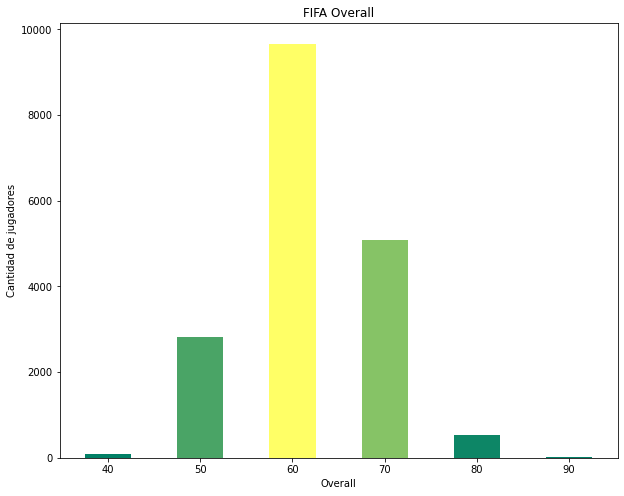

In [ ]:
x = [40, 50, 60, 70, 80, 90]
y = [category_overall01, category_overall02, category_overall03, category_overall04, category_overall05, category_overall06]

plt.ylabel('Cantidad de jugadores')
plt.xlabel('Overall')
plt.title('FIFA Overall')

normdata2 = colors.Normalize(min(y), max(y))
colormap2 = cm.get_cmap("summer")
colores2 =colormap2(normdata2(y))

plt.bar(x, y, width = 5, color = colores2)

plt.show()

### 3. Investigar alguna herramienta o software que permita generar reportes con Python utilizando CodeLabs.

#### Pandas Profiling es una libreria que nos permite generar reportes a partir de un data frame, permitiendonos conocer a profundidad los aspectos mas relevantes de nuestro conjunto de datos. 

#### Mediante el método de ProfileReport podemos entonces generar el ya mencionado reporte, pasandole como argumento el data frame previamente construido.
#### La función to_notebook_iframe() nos permite renderizar y adaptar el reporte en proyectos basados en google colab o jupyter notebook, mientras que la función to_file(output_file="fifa_report.html") nos permite generar el reporte definitivo en formato html.

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     |████████████████████████████████| 25.9 MB 1.9 MB/s 
     |████████████████████████████████| 306 kB 5.3 MB/s 
  Using cached tangled_up_in_unicode-0.2.0-py3-none-any.whl (4.7 MB)
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=29f33bde409b8b026fac5926529975fb6c9fff2de0d4d494f997e92ea99632f2
  Stored in directory: /tmp/pip-ephem-wheel-cache-ga6e02ko/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
Successfully built pandas-profiling
  Attempting uninstall: tangled-up-in-unicode
    Found existing installation: tangled-up-in-unicode 0.1.0
    Uninstalling tangled-up-in-unicode-0.1.0:
      Successfully uninstalled tangled-up-in-unicode-0.1.0
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 3.1.0
    Uninstalling p

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(ove_data, title='FIFA Report', html={'style':{'full_width':True}})

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file(output_file="fifa_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Se podra verificar el reporte generado ingresando a:
<a href="https://drive.google.com/drive/folders/1mD5YFOyIwlzBwK6cUxbz6L4Wsxtdpr-4?usp=sharing" title="Web de Manuales y Tutoriales de Programación">Reporte FIFA</a>